In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Set seed for reproducibility
from numpy.random import seed
import tensorflow as tf
seed(1)
tf.random.set_seed(1)

In [3]:
import seaborn as sns
sns.set(style="darkgrid")

# 1 Exploratory Data Analysis

In [4]:
df = pd.read_csv('indexProcessed.csv')
df2 = pd.read_csv('indexInfo.csv')

In [301]:
df.head()

,Index,Date,Open,High,Low,Close,Adj Close,Volume,CloseUSD
0,HSI,1986-12-31,2568.300049,2568.300049,2568.300049,2568.300049,2568.300049,0.0,333.879006
1,HSI,1987-01-02,2540.100098,2540.100098,2540.100098,2540.100098,2540.100098,0.0,330.213013
2,HSI,1987-01-05,2552.399902,2552.399902,2552.399902,2552.399902,2552.399902,0.0,331.811987
3,HSI,1987-01-06,2583.899902,2583.899902,2583.899902,2583.899902,2583.899902,0.0,335.906987
4,HSI,1987-01-07,2607.100098,2607.100098,2607.100098,2607.100098,2607.100098,0.0,338.923013


In [5]:
df.tail()

,Index,Date,Open,High,Low,Close,Adj Close,Volume,CloseUSD
104219,J203.JO,2021-05-25,66054.92188,66812.45313,66022.97656,66076.67969,66076.67969,0.0,4625.367578
104220,J203.JO,2021-05-26,66076.67969,66446.36719,66030.35156,66108.22656,66108.22656,0.0,4627.575859
104221,J203.JO,2021-05-27,66108.22656,66940.25000,66102.54688,66940.25000,66940.25000,0.0,4685.817500
104222,J203.JO,2021-05-28,66940.25000,67726.56250,66794.60938,67554.85938,67554.85938,0.0,4728.840157
104223,J203.JO,2021-05-31,67554.85938,68140.85156,67554.85938,67964.03906,67964.03906,0.0,4757.482734


In [6]:
df.describe().columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'CloseUSD'], dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104224 entries, 0 to 104223
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Index      104224 non-null  object 
 1   Date       104224 non-null  object 
 2   Open       104224 non-null  float64
 3   High       104224 non-null  float64
 4   Low        104224 non-null  float64
 5   Close      104224 non-null  float64
 6   Adj Close  104224 non-null  float64
 7   Volume     104224 non-null  float64
 8   CloseUSD   104224 non-null  float64
dtypes: float64(7), object(2)
memory usage: 7.2+ MB


In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Region    14 non-null     object
 1   Exchange  14 non-null     object
 2   Index     14 non-null     object
 3   Currency  14 non-null     object
dtypes: object(4)
memory usage: 576.0+ bytes


In [9]:
df2.head()

,Region,Exchange,Index,Currency
0,United States,New York Stock Exchange,NYA,USD
1,United States,NASDAQ,IXIC,USD
2,Hong Kong,Hong Kong Stock Exchange,HSI,HKD
3,China,Shanghai Stock Exchange,000001.SS,CNY
4,Japan,Tokyo Stock Exchange,N225,JPY


In [10]:
df2

,Region,Exchange,Index,Currency
0,United States,New York Stock Exchange,NYA,USD
1,United States,NASDAQ,IXIC,USD
2,Hong Kong,Hong Kong Stock Exchange,HSI,HKD
3,China,Shanghai Stock Exchange,000001.SS,CNY
4,Japan,Tokyo Stock Exchange,N225,JPY
5,Europe,Euronext,N100,EUR
6,China,Shenzhen Stock Exchange,399001.SZ,CNY
7,Canada,Toronto Stock Exchange,GSPTSE,CAD
8,India,National Stock Exchange of India,NSEI,INR
9,Germany,Frankfurt Stock Exchange,GDAXI,EUR


In [11]:
df.dropna(inplace = True)
df['Date'] = pd.to_datetime(df['Date'])

# Adding new features
new_features = ['price_change', 'close_change', 'close_change%', 'volume_change', 'volume_change%']
for i in new_features:
    df[i] = 0
    df[i] = df[i].astype('float')
# Volume change
df_ch = df.query("Index == 'SSMI'")
df_ch = df_ch.reset_index(drop = True)
for i in range(1,len(df_ch)):
    df_ch['price_change'][i] = df_ch['Close'][i] - df_ch['Open'][i]
    df_ch['close_change'][i] = df_ch['Close'][i] - df_ch['Close'][i-1]
    df_ch['close_change%'][i] = ((df_ch['Close'][i] / df_ch['Close'][i-1]) * 100) - 100
    if df_ch['Volume'][i] != 0 and df['Volume'][i-1] != 0:
        df_ch['volume_change'][i] = df_ch['Volume'][i] - df_ch['Volume'][i-1]
        df_ch['volume_change%'][i] = ((df_ch['Volume'][i] / df_ch['Volume'][i-1]) * 100) - 100


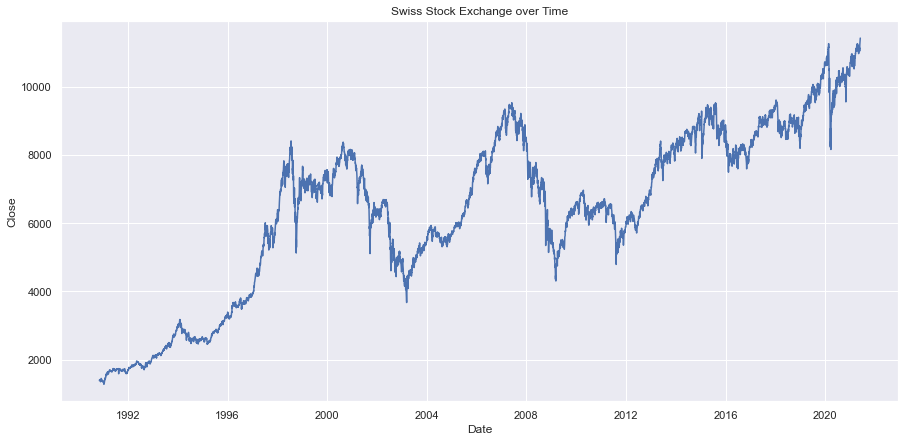

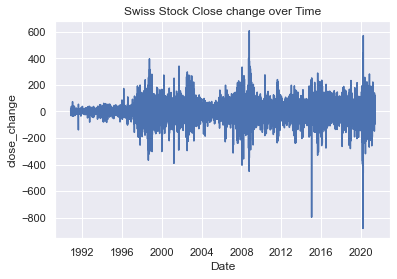

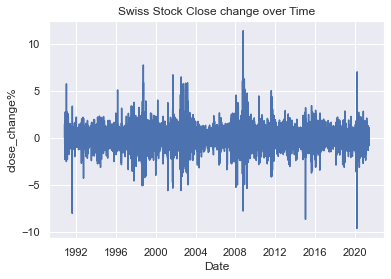

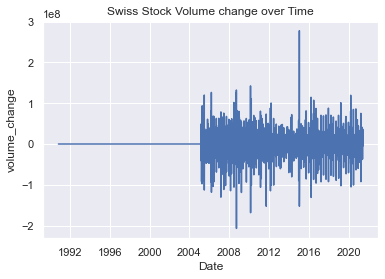

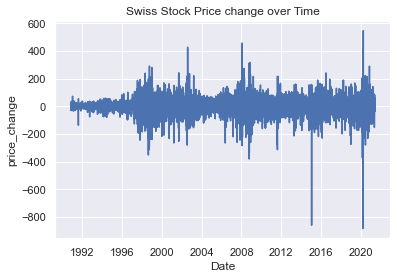

In [12]:
plt.figure(figsize = (15, 7))
a = sns.lineplot(data = df_ch, x = "Date", y = "Close")
plt.title('Swiss Stock Exchange over Time')
plt.show()
b = sns.lineplot(data = df_ch, x = "Date", y = "close_change")
plt.title('Swiss Stock Close change over Time')
plt.subplot()
plt.show()
c = sns.lineplot(data = df_ch, x = "Date", y = "close_change%")
plt.title('Swiss Stock Close change over Time')
plt.subplot()
plt.show()
d = sns.lineplot(data = df_ch, x = "Date", y = "volume_change")
plt.title('Swiss Stock Volume change over Time')
plt.show()
e = sns.lineplot(data = df_ch, x = "Date", y = "price_change")
plt.title('Swiss Stock Price change over Time')
plt.show()


In [85]:
df_ch2.head()

,Index,Date,Open,High,Low,Close,Adj Close,Volume,CloseUSD,H-L,C-O,7MA,14MA,21MA,7SD,14RSI,ND_Close
35,SSMI,1991-01-04,1372.099976,1375.900024,1366.599976,1371.699951,1371.699951,0.0,1522.586946,9.300048,-0.400025,1379.628557,1391.735709,1400.671427,7.076691,40.708564,1340.300049
36,SSMI,1991-01-07,1368.800049,1369.199951,1338.300049,1340.300049,1340.300049,0.0,1487.733054,30.899902,-28.500000,1375.214286,1386.478568,1398.547619,15.537266,31.684616,1326.400024
37,SSMI,1991-01-08,1338.599976,1338.599976,1323.699951,1326.400024,1326.400024,0.0,1472.304027,14.900025,-12.199952,1366.428571,1379.799996,1394.595238,21.946133,28.656289,1349.900024
38,SSMI,1991-01-09,1326.400024,1350.699951,1326.400024,1349.900024,1349.900024,0.0,1498.389027,24.299927,23.500000,1361.071429,1375.007141,1392.061907,20.715513,39.231100,1331.500000
39,SSMI,1991-01-10,1346.300049,1346.300049,1325.900024,1331.500000,1331.500000,0.0,1477.965000,20.400025,-14.800049,1353.571429,1369.571428,1388.257144,20.559765,34.872605,1320.900024


### Adding Technical Indicators

In [5]:
# Adding technical indicators to our data frame
import pandas_ta as ta

df_ch2 = df.query("Index == 'SSMI'")
df_ch2 = df_ch2.reset_index(drop = True)
new_data = df_ch2[['Close']]
new_data_set = new_data.values

new_features = ['H-L', 'C-O', '7MA', '14MA', '21MA', '7SD','14RSI', 'ND_Close']
for i in new_features:
    df[i] = 0

df_ch2 = df.query("Index == 'SSMI'")
df_ch2 = df_ch2.reset_index(drop = True)
for i in range(0,len(df_ch2)):
    df_ch2['H-L'][i] = df_ch2['High'][i] - df_ch2['Low'][i]
    df_ch2['C-O'][i] = df_ch2['Close'][i] - df_ch2['Open'][i]
    if i >= 7:
        df_ch2['7MA'][i-1] = sum(df_ch2['Close'][i-7:i])/7
        df_ch2['7SD'][i-1] = np.std(df_ch2['Close'][i-7:i])
    if i >= 14:
        df_ch2['14MA'][i-1] = sum(df_ch2['Close'][i-14:i])/14 
    if i >= 21:
        df_ch2['21MA'][i-1] = sum(df_ch2['Close'][i-21:i])/21

df_ch2['14RSI'] = ta.rsi(df_ch2['Close'], length = 14)
df_ch2['ND_Close'][0:len(df_ch2['Close'])-1] = df_ch2['Close'][1:len(df_ch2['Close'])]
df_ch2.dropna(inplace = True)
df_ch2.tail()

,Index,Date,Open,High,Low,Close,Adj Close,Volume,CloseUSD,H-L,C-O,7MA,14MA,21MA,7SD,14RSI,ND_Close
7666,SSMI,2021-05-20,11091.32031,11152.08008,11054.41992,11152.08008,11152.08008,42271500.0,12378.808889,97.66016,60.75977,11107.534320,11095.189244,11119.531901,44.195824,52.821189,11225.58008
7667,SSMI,2021-05-21,11205.80957,11239.20020,11138.90039,11225.58008,11225.58008,43988800.0,12460.393889,100.29981,19.77051,11122.092914,11103.912110,11120.281436,60.784950,56.491292,11348.74023
7668,SSMI,2021-05-26,11325.41992,11382.32031,11310.41992,11348.74023,11348.74023,40702000.0,12597.101655,71.90039,23.32031,11167.070034,11123.142857,11133.127139,88.877256,61.847116,11340.26953
7669,SSMI,2021-05-27,11341.19043,11408.61035,11321.11035,11340.26953,11340.26953,77076000.0,12587.699178,87.50000,-0.92090,11198.427177,11145.852121,11139.373791,104.379529,61.288310,11426.15039
7670,SSMI,2021-05-28,11345.40039,11443.96973,11326.75000,11426.15039,11426.15039,40919400.0,12683.026933,117.21973,80.75000,0.000000,0.000000,0.000000,0.000000,64.764359,0.00000


In [7]:
df_ch2.drop(df_ch2.tail(1).index,inplace=True)
df_ch2.drop(df_ch2.head(21).index,inplace=True)

<AxesSubplot:>

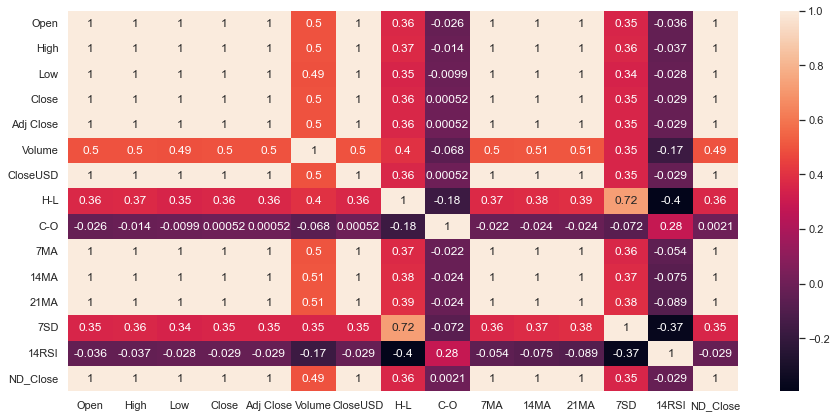

In [8]:
df_corr = df_ch2.corr()
fig,ax = plt.subplots(figsize=(15,7))
sns.heatmap(df_corr, annot = True)

<Figure size 432x288 with 0 Axes>

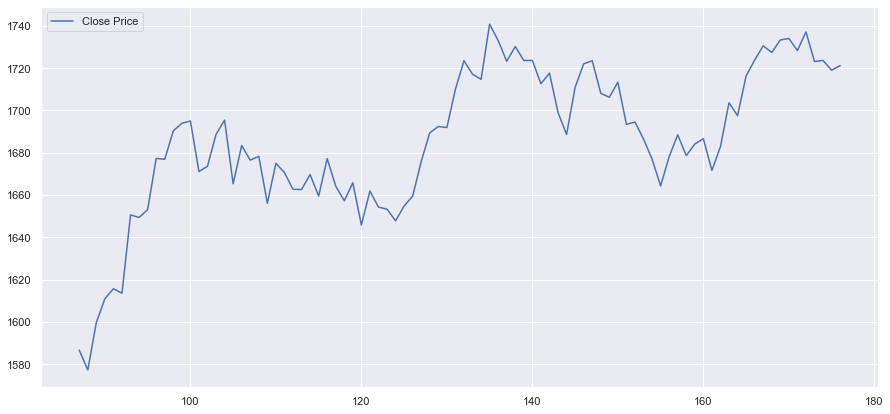

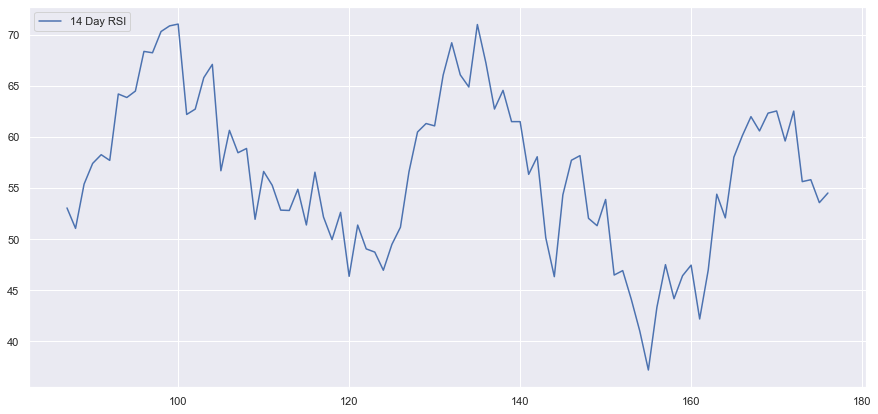

<Figure size 432x288 with 0 Axes>

In [26]:
fig,bx = plt.subplots(figsize=(15,7))
bx.plot(df_ch2['Close'][10:100], label = "Close Price")
plt.legend(loc="upper left")
fig,ax = plt.subplots(figsize=(15,7))
ax.plot(df_ch2['14RSI'][10:100], label = "14 Day RSI")
plt.legend(loc="upper left")
plt.figure()

# 2 Using MLP Regressor

## 2.1 Using only Close Price

### 2.1.1 Data Pre-Processing

In [9]:
# First iteration : we will only use closing price
new_data = df_ch2[['Close']]
new_data_set = new_data.values

# I want to the test set to be a year which is about 0.047 of the length
train_set_len = int(np.ceil(len(new_data_set)*(1-0.1)))

# We scale the data using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(new_data_set)

# We separate intro train and test sets
train_data = scaled_data[0:train_set_len]
test_data = scaled_data[train_set_len - 30:]

# Next we make our X_train and Y_train
X_train = []
Y_train = []
X_test = []
Y_test = scaled_data[train_set_len:]

# To predict the next day close price, we will use the past 30 days closing prices
for i in range(30, len(train_data)):
            X_train.append(train_data[i-30:i,0])
            Y_train.append(train_data[i,0])
            
for i in range(30, len(test_data)):
            X_test.append(test_data[i-30:i, 0])
        
# To fit our model our data needs to be in array form
X_train, Y_train = np.array(X_train), np.array(Y_train)
X_test = np.array(X_test)
dates = df_ch2['Date'].values

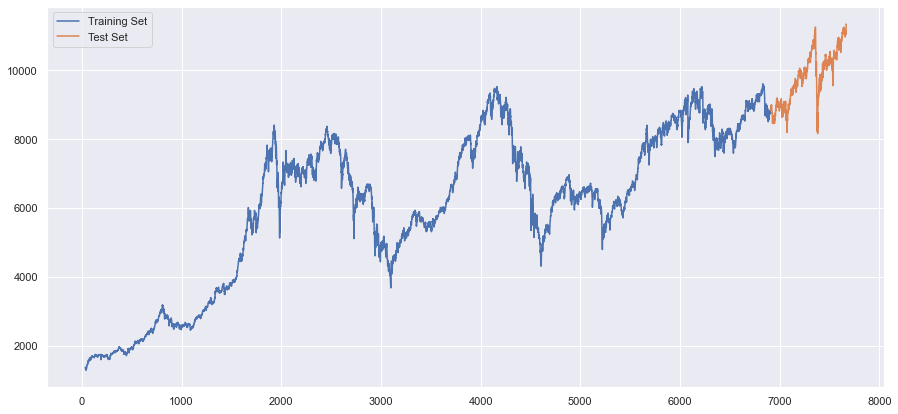

In [10]:
fig,ax = plt.subplots(figsize=(15,7))
ax.plot(df_ch2['Close'][0:train_set_len], label = "Training Set")
ax.plot(df_ch2['Close'][train_set_len:], label = "Test Set")
plt.legend(loc="upper left")

### 2.1.2 Building our MLP Model

In [11]:
# We are prediction a continuous numerical value so we can use MLPRegressor
from sklearn.neural_network import MLPRegressor
from keras.callbacks import History 


# Training the model
mlp_reg = MLPRegressor(random_state = 0, shuffle = True, hidden_layer_sizes = (100,), solver = 'adam', learning_rate_init = 0.001)
mlp_reg.fit(X_train, Y_train)


# Predicting on our test set
Y_pred = mlp_reg.predict(X_test)


In [12]:
# We look at the RMSE, MSLE, MAPE
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_absolute_percentage_error

print(mean_squared_error(Y_test,Y_pred, squared = False))
print(mean_squared_log_error(Y_test, Y_pred, squared = False))
print(mean_absolute_percentage_error(Y_test, Y_pred))

0.01822754715355636
0.009994915344238901
0.015609954007871503


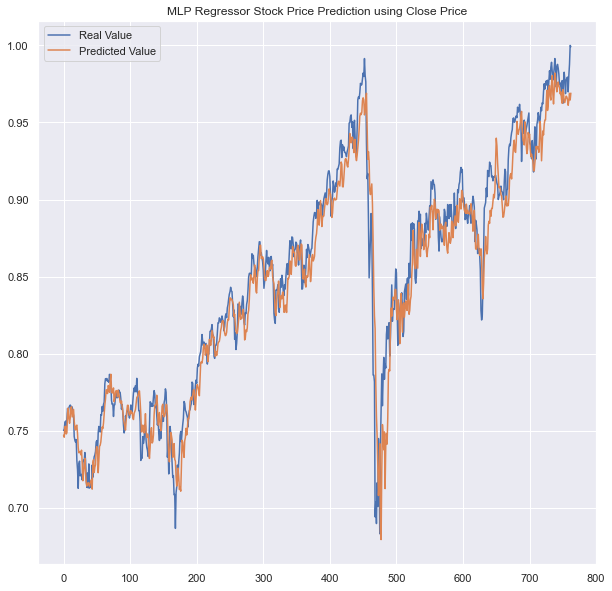

In [13]:
# We plot our predicted vs the true stock price
fig,ax = plt.subplots(figsize=(10,10))
ax.plot(Y_test,label = 'Real Value')
ax.plot(Y_pred,label = 'Predicted Value')
ax.title.set_text("MLP Regressor Stock Price Prediction using Close Price")
plt.legend(loc="upper left")

### 2.1.3 Cross Validation

In [9]:
# We perform a sliding window Cross Validation
from sklearn.model_selection import TimeSeriesSplit

X = []
y = []

for i in range(30, len(scaled_data)):
            X.append(scaled_data[i-30:i,0])
            y.append(scaled_data[i,0])
X = np.array(X)
y = np.array(y)
rmse = 0
rmsle = 0
mape = 0

tscv = TimeSeriesSplit(n_splits=5, test_size = 600)
for train_index, test_index in tscv.split(X):
    print("TRAIN:", len(train_index), "TEST:", len(test_index))
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Training the model
    mlp_reg = MLPRegressor(random_state = 0, shuffle = False,solver = 'lbfgs',hidden_layer_sizes = (100,40,), max_iter = 1000, learning_rate_init = 0.001)
    mlp_reg.fit(X_train, y_train)

    # Predicting on our test set
    Y_pred = mlp_reg.predict(X_test)
    
    rmse = rmse + mean_squared_error(y_test,Y_pred, squared = False)
    rmsle = rmsle +mean_squared_log_error(y_test, Y_pred, squared= False)
    mape = mape + mean_absolute_percentage_error(y_test, Y_pred)
    print(mean_squared_error(y_test,Y_pred, squared = False))
    print(mean_squared_log_error(y_test, Y_pred))
    print(mean_absolute_percentage_error(y_test, Y_pred))
    

TRAIN: 4605 TEST: 600
0.010307138107544443
4.957516665656812e-05
0.01596550389524074
TRAIN: 5205 TEST: 600
0.00951841006672984
3.5538933908565286e-05
0.012734079668251842
TRAIN: 5805 TEST: 600
0.022232310637620524
0.00016843298935038917
0.022858274505806762
TRAIN: 6405 TEST: 600
0.013144312641775428
5.698462954329675e-05
0.013362993722943726
TRAIN: 7005 TEST: 600
0.017555847712467983
9.154498344224012e-05
0.014730033192659092


In [10]:
rmse = rmse/5
rmsle = rmsle/5
mape = mape/5

print(rmse)
print(rmsle)
print(mape)

0.014551603833227645
0.008619464352262825
0.01593017699698043


## 2.2 Using Technical Indicators

### 2.2.1 Data Pre-Processing

In [14]:
# First iteration : we will only use closing price
new_data = df_ch2[['H-L', 'C-O', '7MA', '14MA', '21MA', '7SD','Volume','14RSI','Close']]
new_data_set = new_data.values

# I want to the test set to be 10 %
train_set_len = int(np.ceil(len(new_data_set)*(1-0.1)))

# We scale the data using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(new_data_set)

# We separate intro train and test sets
train_data = scaled_data[0:train_set_len]
test_data = scaled_data[train_set_len - 30:]

# Next we make our X_train and Y_train
X_train = []
Y_train = []
X_test = []
Y_test = scaled_data[train_set_len:,-1]

# To predict the next day close price, we will use the past 30 days closing prices
for i in range(30, len(train_data)):
            X_train.append(train_data[i-30:i,:])
            Y_train.append(train_data[i,-1])
            
for i in range(30, len(test_data)):
            X_test.append(test_data[i-30:i, :])


X_train, Y_train = np.array(X_train), np.array(Y_train)
X_test = np.array(X_test)
dates = df_ch2['Date'].values

x_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1]*9))
x_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1]*9))

### 2.2.2 Building our MLPRegressor

In [15]:
# We are prediction a continuous numerical value so we can use MLPRegressor
from sklearn.neural_network import MLPRegressor

# Training the model
mlp_reg = MLPRegressor(random_state = 0, shuffle = False,solver = 'lbfgs',hidden_layer_sizes = (100,40,), max_iter = 1000, learning_rate_init = 0.001)
mlp_reg.fit(x_train, Y_train)

# Predicting on our test set
Y_pred = mlp_reg.predict(x_test)

In [16]:
# We look at the RMSE, MSLE, MAPE
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_absolute_percentage_error

print(mean_squared_error(Y_test,Y_pred, squared = False))
print(mean_squared_log_error(Y_test, Y_pred, squared = False))
print(mean_absolute_percentage_error(Y_test, Y_pred))

0.017967215491299787
0.00985496563409163
0.015011767264707923


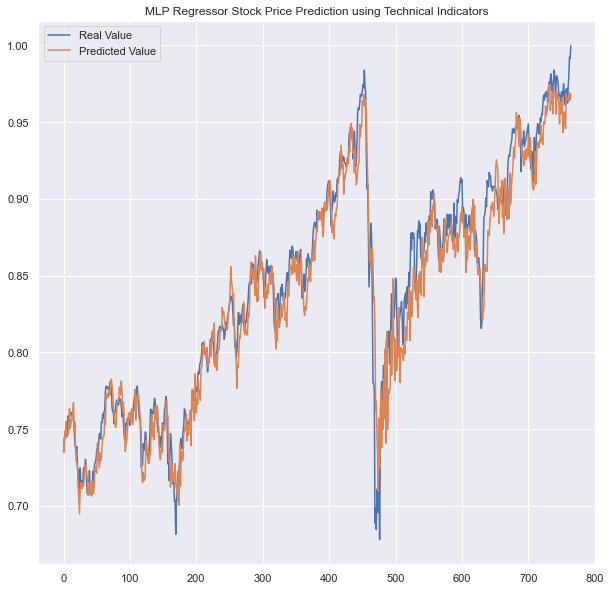

In [36]:
# We plot our predicted vs the true stock price
fig,ax = plt.subplots(figsize=(10,10))
ax.plot(Y_test,label = 'Real Value')
ax.plot(Y_pred,label = 'Predicted Value')
ax.title.set_text("MLP Regressor Stock Price Prediction using Technical Indicators")
plt.legend(loc="upper left")

## 2.2.3 Cross Validation

In [14]:
# We perform a sliding window Cross Validation
from sklearn.model_selection import TimeSeriesSplit

X = []
y = []

for i in range(30, len(scaled_data)):
            X.append(scaled_data[i-30:i,:])
            y.append(scaled_data[i,-1])
X = np.array(X)
y = np.array(y)
rmse = 0
rmsle = 0
mape = 0

tscv = TimeSeriesSplit(n_splits=5, test_size = 600)
for train_index, test_index in tscv.split(X):
    print("TRAIN:", len(train_index), "TEST:", len(test_index))
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Training the model
    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1]*9))
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1]*9))
    mlp_reg = MLPRegressor(random_state = 0, shuffle = False,solver = 'lbfgs',hidden_layer_sizes = (100,40,), max_iter = 1000, learning_rate_init = 0.001)
    mlp_reg.fit(X_train, y_train)

    # Predicting on our test set
    Y_pred = mlp_reg.predict(X_test)
    
    rmse = rmse + mean_squared_error(y_test,Y_pred, squared = False)
    rmsle = rmsle +mean_squared_log_error(y_test, Y_pred, squared= False)
    mape = mape + mean_absolute_percentage_error(y_test, Y_pred)
    print(mean_squared_error(y_test,Y_pred, squared = False))
    print(mean_squared_log_error(y_test, Y_pred))
    print(mean_absolute_percentage_error(y_test, Y_pred))
    

TRAIN: 4605 TEST: 600
0.012020578572416278
6.67905661330796e-05
0.019336494104189795
TRAIN: 5205 TEST: 600
0.00944752094449906
3.522780708083043e-05
0.012794207955833112
TRAIN: 5805 TEST: 600
0.015154723746920028
7.854259612557224e-05
0.014974693770969901
TRAIN: 6405 TEST: 600
0.008869227504157105
2.587445608400557e-05
0.009376272420077351
TRAIN: 7005 TEST: 600
0.02192434187501139
0.00014632714846717036
0.016903064101352457


In [15]:
rmse = rmse/5
rmsle = rmsle/5
mape = mape/5

print(rmse)
print(rmsle)
print(mape)

0.013483278528600772
0.008030709464939298
0.014676946470484526


# 3 LTSM Recursive Neural Network (RNN) using Keras

## 3.1 Using only Close price

## 3.1.1 Pre Processing the Data

In [16]:

from tensorflow.keras import regularizers
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from keras import optimizers
from sklearn.metrics import accuracy_score
from tensorflow.keras import datasets, layers,models
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Dense, Activation,SimpleRNN, LSTM

In [17]:
# First iteration : we will only use closing price
new_data = df_ch2[['Close']]
new_data_set = new_data.values

# I want to the test set to be a year which is about 0.047 of the length
train_set_len = int(np.ceil(len(new_data_set)*(1-0.1)))

# We scale the data using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(new_data_set)

# We separate intro train and test sets
train_data = scaled_data[0:train_set_len]
test_data = scaled_data[train_set_len - 30:]

# Next we make our X_train and Y_train
X_train = []
Y_train = []
X_test = []
Y_test = scaled_data[train_set_len:]

# To predict the next day close price, we will use the past 30 days closing prices
for i in range(30, len(train_data)):
            X_train.append(train_data[i-30:i,0])
            Y_train.append(train_data[i,0])
            
for i in range(30, len(test_data)):
            X_test.append(test_data[i-30:i, 0])
        
# To fit our model our data needs to be in array form
X_train, Y_train = np.array(X_train), np.array(Y_train)
X_test = np.array(X_test)
dates = df_ch2['Date'].values

In [18]:
# LSTM expects data in the form [samples, time_frame, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1 ))

### 3.1.2 Building our LTSM RNN

In [19]:
model = Sequential()
model.add(LSTM(125, return_sequences=True, input_shape= (X_train.shape[1], 1)))
model.add(LSTM(65, return_sequences=False))
model.add(Dense(32))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, Y_train, batch_size=64, epochs= 20 )
y_pred = model.predict(X_test)
y_test = Y_test

Epoch 1/20
107/107 [==============================] - 15s 85ms/step - loss: 0.0062
Epoch 2/20
107/107 [==============================] - 10s 90ms/step - loss: 2.5563e-04
Epoch 3/20
107/107 [==============================] - 10s 91ms/step - loss: 2.4513e-04
Epoch 4/20
107/107 [==============================] - 10s 92ms/step - loss: 2.3842e-04
Epoch 5/20
107/107 [==============================] - 10s 96ms/step - loss: 2.3486e-04
Epoch 6/20
107/107 [==============================] - 10s 97ms/step - loss: 2.1886e-04
Epoch 7/20
107/107 [==============================] - 11s 101ms/step - loss: 2.0419e-04
Epoch 8/20
107/107 [==============================] - 11s 101ms/step - loss: 1.9915e-04
Epoch 9/20
107/107 [==============================] - 11s 102ms/step - loss: 1.9958e-04
Epoch 10/20
107/107 [==============================] - 11s 104ms/step - loss: 2.0855e-04
Epoch 11/20
107/107 [==============================] - 11s 107ms/step - loss: 1.9215e-04
Epoch 12/20
107/107 [===================

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 125)           63500     
                                                                 
 lstm_1 (LSTM)               (None, 65)                49660     
                                                                 
 dense (Dense)               (None, 32)                2112      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 115,305
Trainable params: 115,305
Non-trainable params: 0
_________________________________________________________________


In [21]:
# We look at the RMSE, MSLE, MAPE
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_absolute_percentage_error

print(mean_squared_error(y_test,y_pred, squared = False))
print(mean_squared_log_error(y_test, y_pred, squared = False))
print(mean_absolute_percentage_error(y_test, y_pred))

0.013996652156130272
0.007658034663467803
0.01194871854596363


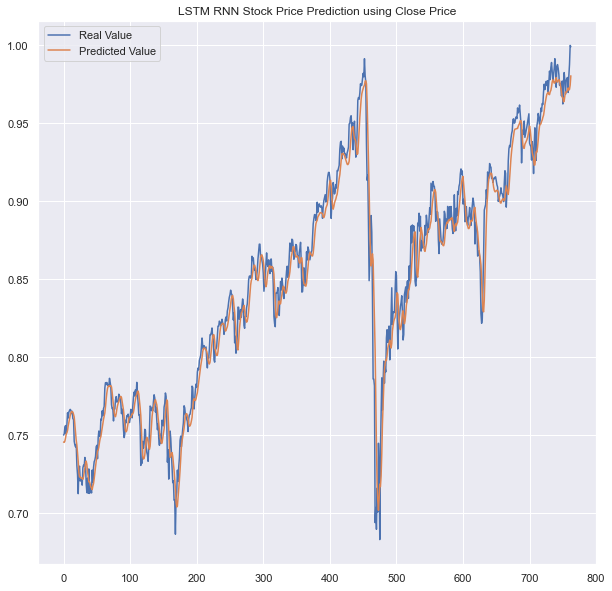

In [25]:
# We plot our predicted vs the true stock price
fig,ax = plt.subplots(figsize=(10,10))
ax.plot(y_test,label = 'Real Value')
ax.plot(y_pred,label = 'Predicted Value')
ax.title.set_text("LSTM RNN Stock Price Prediction using Close Price")
plt.legend(loc="upper left")

### 3.1.3 Cross Validation

In [26]:
# We perform a sliding window Cross Validation
X = []
y = []
rmse = 0
rmsle = 0
mape = 0
for i in range(30, len(scaled_data)):
            X.append(scaled_data[i-30:i,0])
            y.append(scaled_data[i,0])
X = np.array(X)
y = np.array(y)

tscv = TimeSeriesSplit(n_splits=5, test_size = 600)
for train_index, test_index in tscv.split(X):
    print("TRAIN:", len(train_index), "TEST:", len(test_index))
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1 ))
    
    # Build Model
    model.fit(X_train, y_train, epochs = 30, batch_size = 64, verbose = 0)
    
    # predict
    y_pred = model.predict(X_test)
    
    # Test accuracy
    rmse = rmse + mean_squared_error(y_test,y_pred, squared = False)
    rmsle = rmsle +mean_squared_log_error(y_test, y_pred, squared= False)
    mape = mape + mean_absolute_percentage_error(y_test, Y_pred)
    print(mean_squared_error(y_test,y_pred, squared = False))
    print(mean_squared_log_error(y_test, y_pred, squared = False))
    print(mean_absolute_percentage_error(y_test, y_pred))
    
    
    

TRAIN: 4605 TEST: 600
19/19 [==============================] - 1s 25ms/step
0.00961475003804306
0.006491612099101978
0.015774722179846084
TRAIN: 5205 TEST: 600
19/19 [==============================] - 1s 27ms/step
0.0074650932137597355
0.004701878271908842
0.010610913587206866
TRAIN: 5805 TEST: 600
19/19 [==============================] - 1s 28ms/step
0.009569101822259264
0.0055654615472506015
0.009650831022740827
TRAIN: 6405 TEST: 600
19/19 [==============================] - 1s 27ms/step
0.006714045703398974
0.003861030307083574
0.006936555724411191
TRAIN: 7005 TEST: 600
19/19 [==============================] - 1s 28ms/step
0.015687759657260807
0.008440779677323733
0.015269396274989635


In [32]:

rmse=rmse/5
rmsle=rmsle/5
mape=mape/5
print(rmse)
print(rmsle)
print(mape)

0.009810150086944368
0.005812152380533746
0.011648483757838921


## 3.2 Using Technical Indicators

### 3.2.1 Data Pre-Processing

In [100]:
# First iteration : we will only use closing price
new_data2 = df_ch2[['H-L', 'C-O', '7MA', '14MA', '21MA', '7SD','Volume','14RSI','Close']]
new_data_set2 = new_data2.values

# I want to the test set to be a year which is about 0. of the length
train_set_len2 = int(np.ceil(len(new_data_set2)*(1-0.1)))

# We scale the data using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data2 = scaler.fit_transform(new_data_set2)

# We separate intro train and test sets
train_data2 = scaled_data2[0:train_set_len2]
test_data2 = scaled_data2[train_set_len2 - 30:]

# Next we make our X_train and Y_train
X_train = []
Y_train = []
X_test = []
Y_test = scaled_data2[train_set_len2:,-1]

# To predict the next day close price, we will use the past 30 days closing prices
for i in range(30, len(train_data2)):
            X_train.append(train_data2[i-30:i,:])
            Y_train.append(train_data2[i,-1])
            
for i in range(30, len(test_data2)):
            X_test.append(test_data2[i-30:i, :])
        
X_train, Y_train = np.array(X_train), np.array(Y_train)
X_test = np.array(X_test)
dates = df_ch2['Date'].values

### 3.2.2 Building our LSTM RNN

In [86]:
# Building stacked LSTM RNN
lstm = Sequential()
lstm.add(LSTM(200, input_shape = (X_train.shape[1], X_train.shape[2]), activation = 'relu', return_sequences = True))
lstm.add(LSTM(200, return_sequences = True))
lstm.add(LSTM(200, activation='relu'))
lstm.add(Dense(32))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')
lstm.summary()

Model: "sequential_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 30, 200)           168000    
                                                                 
 lstm_6 (LSTM)               (None, 30, 200)           320800    
                                                                 
 lstm_7 (LSTM)               (None, 200)               320800    
                                                                 
 dense_115 (Dense)           (None, 32)                6432      
                                                                 
 dense_116 (Dense)           (None, 1)                 33        
                                                                 
Total params: 816,065
Trainable params: 816,065
Non-trainable params: 0
_________________________________________________________________


In [89]:
lstm.fit(X_train, Y_train, epochs = 50, batch_size = 128)

Epoch 1/50
54/54 [==============================] - 26s 357ms/step - loss: 0.0138
Epoch 2/50
54/54 [==============================] - 18s 332ms/step - loss: 3.6363e-04
Epoch 3/50
54/54 [==============================] - 19s 352ms/step - loss: 2.7261e-04
Epoch 4/50
54/54 [==============================] - 20s 369ms/step - loss: 2.3434e-04
Epoch 5/50
54/54 [==============================] - 20s 370ms/step - loss: 2.0834e-04
Epoch 6/50
54/54 [==============================] - 20s 362ms/step - loss: 2.0472e-04
Epoch 7/50
54/54 [==============================] - 19s 355ms/step - loss: 1.7222e-04
Epoch 8/50
54/54 [==============================] - 20s 366ms/step - loss: 1.7639e-04
Epoch 9/50
54/54 [==============================] - 19s 361ms/step - loss: 2.1471e-04
Epoch 10/50
54/54 [==============================] - 20s 370ms/step - loss: 1.5572e-04
Epoch 11/50
54/54 [==============================] - 19s 360ms/step - loss: 1.4782e-04
Epoch 12/50
54/54 [==============================] - 20s

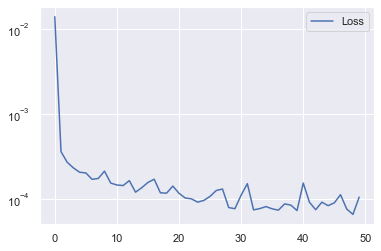

In [90]:
plt.plot(lstm.history.history['loss'],label='Loss')
plt.yscale('log')
plt.legend()

In [91]:
y_pred = lstm.predict(X_test)

24/24 [==============================] - 3s 89ms/step


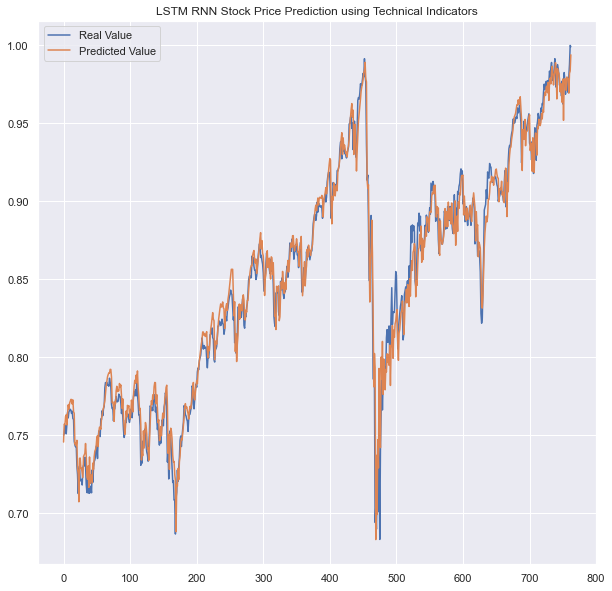

In [92]:
# We plot our predicted vs the true stock price
fig,ax = plt.subplots(figsize=(10,10))
ax.plot(Y_test,label = 'Real Value')
ax.plot(y_pred,label = 'Predicted Value')
ax.title.set_text("LSTM RNN Stock Price Prediction using Technical Indicators")
plt.legend(loc="upper left")

In [93]:
# We look at the RMSE, MSLE, MAPE
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_absolute_percentage_error

print(mean_squared_error(Y_test,y_pred, squared = False))
print(mean_squared_log_error(Y_test, y_pred, squared = False))
print(mean_absolute_percentage_error(Y_test, y_pred))

0.011979257846196509
0.006600627854927028
0.010078633519619073


## 3.2.3 Cross Validation

In [81]:
# We perform a sliding window Cross Validation
from sklearn.model_selection import TimeSeriesSplit

X = []
y = []
rmse = 0
rmsle = 0
mape = 0
for i in range(30, len(scaled_data2)):
            X.append(scaled_data2[i-30:i,:])
            y.append(scaled_data2[i,-1])
X = np.array(X)
y = np.array(y)

tscv = TimeSeriesSplit(n_splits=5, test_size = 600)
for train_index, test_index in tscv.split(X):
    print("TRAIN:", len(train_index), "TEST:", len(test_index))
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Build Model
    lstm.fit(X_train, y_train, epochs = 30, batch_size = 64, verbose = 0)
    
    # predict
    y_pred = lstm.predict(X_test)
    
    # Test accuracy
    print(mean_squared_error(y_test,y_pred, squared = False))
    print(mean_squared_log_error(y_test, y_pred, squared = False))
    print(mean_absolute_percentage_error(y_test, y_pred))
    
    

TRAIN: 4605 TEST: 600
19/19 [==============================] - 2s 61ms/step
0.011071179361710612
0.007472610173239271
0.018248862373963063
TRAIN: 5205 TEST: 600
19/19 [==============================] - 1s 62ms/step
0.006825082056936922
0.004309470308041404
0.00916196065826338
TRAIN: 5805 TEST: 600
19/19 [==============================] - 1s 76ms/step
0.009978163580712279
0.00579835793703713
0.010041065578928468
TRAIN: 6405 TEST: 600
19/19 [==============================] - 1s 65ms/step
0.009563176505616935
0.005483768117167391
0.010646391709830005
TRAIN: 7005 TEST: 600
19/19 [==============================] - 1s 58ms/step
0.015998607075772883
0.008690863695419514
0.014466884394382014


In [83]:
rmse=(0.011071179361710612+0.006825082056936922+0.009978163580712279+0.009563176505616935+0.015998607075772883)/5
rmsle=(0.007472610173239271+0.004309470308041404+0.00579835793703713+0.005483768117167391+0.008690863695419514)/5
mape=(0.018248862373963063+0.00916196065826338+0.010041065578928468+0.010646391709830005+0.014466884394382014)/5
print(rmse)
print(rmsle)
print(mape)

0.010687241716149926
0.006351014046180941
0.012513032943073387


## 4 Simple ANN Model

## 4.1 Using only Close Price

### 4.1.1 Data Pre-Processing

In [94]:
### First iteration : we will only use closing price
new_data = df_ch2[['Close']]
new_data_set = new_data.values

# I want to the test set to be a year which is about 0.047 of the length
train_set_len = int(np.ceil(len(new_data_set)*(1-0.1)))

# We scale the data using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(new_data_set)

# We separate intro train and test sets
train_data = scaled_data[0:train_set_len]
test_data = scaled_data[train_set_len - 30:]

# Next we make our X_train and Y_train
X_train = []
Y_train = []
X_test = []
Y_test = scaled_data[train_set_len:]

# To predict the next day close price, we will use the past 30 days closing prices
for i in range(30, len(train_data)):
            X_train.append(train_data[i-30:i,0])
            Y_train.append(train_data[i,0])
            
for i in range(30, len(test_data)):
            X_test.append(test_data[i-30:i, 0])
        
# To fit our model our data needs to be in array form
X_train, Y_train = np.array(X_train), np.array(Y_train)
X_test = np.array(X_test)
dates = df_ch2['Date'].values

# ANN expects data in the form 2D array
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1 ))

### 4.1.1 Building our ANN

In [95]:
# Building our ANN
ann = Sequential()
ann.add(Dense(units = 120, activation = 'relu', input_dim = X_train.shape[1]))
ann.add(Dense(units = 60))
ann.add(Dense(units = 1))
ann.compile(optimizer = 'adam', loss = 'mean_squared_error')
ann.fit(X_train, Y_train, batch_size = 32, epochs = 50)

Epoch 1/50
214/214 [==============================] - 1s 2ms/step - loss: 8.3836e-04
Epoch 2/50
214/214 [==============================] - 1s 3ms/step - loss: 2.0306e-04
Epoch 3/50
214/214 [==============================] - 1s 2ms/step - loss: 2.1973e-04
Epoch 4/50
214/214 [==============================] - 1s 3ms/step - loss: 1.7138e-04
Epoch 5/50
214/214 [==============================] - 1s 3ms/step - loss: 1.6604e-04
Epoch 6/50
214/214 [==============================] - 1s 3ms/step - loss: 1.2246e-04
Epoch 7/50
214/214 [==============================] - 1s 3ms/step - loss: 1.3991e-04
Epoch 8/50
214/214 [==============================] - 1s 3ms/step - loss: 1.5283e-04
Epoch 9/50
214/214 [==============================] - 1s 2ms/step - loss: 1.5249e-04
Epoch 10/50
214/214 [==============================] - 1s 2ms/step - loss: 1.2624e-04
Epoch 11/50
214/214 [==============================] - 1s 2ms/step - loss: 1.2660e-04
Epoch 12/50
214/214 [==============================] - 1s 2ms/s

In [96]:
y_pred = ann.predict(X_test)

24/24 [==============================] - 0s 2ms/step


In [97]:
# We look at the RMSE, MSLE, MAPE
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_absolute_percentage_error

print(mean_squared_error(Y_test,y_pred, squared = False))
print(mean_squared_log_error(Y_test, y_pred))
print(mean_absolute_percentage_error(Y_test, y_pred))

0.0170098997034449
8.56072605104359e-05
0.017341960361448888


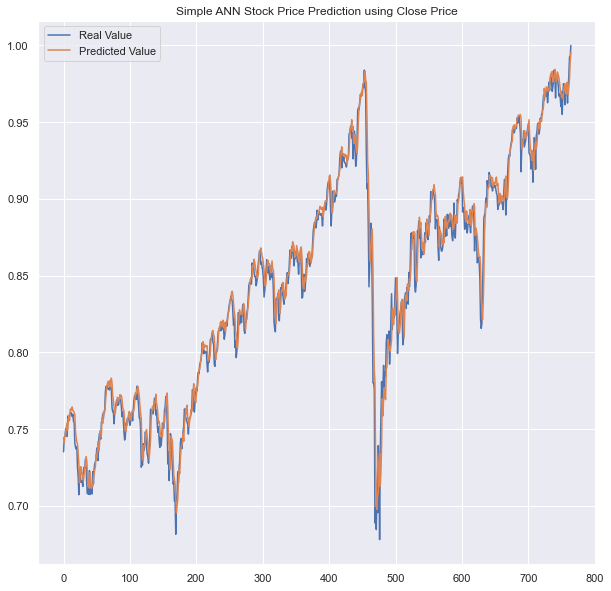

In [68]:
# We plot our predicted vs the true stock price
fig,ax = plt.subplots(figsize=(10,10))
ax.plot(Y_test,label = 'Real Value')
ax.plot(y_pred,label = 'Predicted Value')
ax.title.set_text("Simple ANN Stock Price Prediction using Close Price")
plt.legend(loc="upper left")

### 4.1.3 Cross Validation

In [98]:
# We perform a sliding window Cross Validation
from sklearn.model_selection import TimeSeriesSplit

X = []
y = []
rmse = 0
rmsle = 0
mape = 0

for i in range(30, len(scaled_data)):
            X.append(scaled_data[i-30:i,0])
            y.append(scaled_data[i,0])
X = np.array(X)
y = np.array(y)


tscv = TimeSeriesSplit(n_splits=5, test_size = 600)
for train_index, test_index in tscv.split(X):
    print("TRAIN:", len(train_index), "TEST:", len(test_index))
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1 ))

    # Building our ANN
    ann.fit(X_train, y_train, batch_size = 32, epochs = 50, verbose = 0)
    
    # Predict
    y_pred = ann.predict(X_test)
    
    # Test accuracy
    rmse = rmse + mean_squared_error(y_test,y_pred, squared = False)
    rmsle = rmsle +mean_squared_log_error(y_test, y_pred, squared= False)
    mape = mape + mean_absolute_percentage_error(y_test, y_pred)
    print(mean_squared_error(y_test,y_pred, squared = False))
    print(mean_squared_log_error(y_test, y_pred, squared = False))
    print(mean_absolute_percentage_error(y_test, y_pred))
    
    

TRAIN: 4605 TEST: 600
19/19 [==============================] - 0s 2ms/step
0.0076517306088113414
0.005197702361097625
0.012117768929147999
TRAIN: 5205 TEST: 600
19/19 [==============================] - 0s 2ms/step
0.00638000408667867
0.004023113535607137
0.008372254560940505
TRAIN: 5805 TEST: 600
19/19 [==============================] - 0s 2ms/step
0.014357580159968934
0.008336097821145685
0.016676126140122736
TRAIN: 6405 TEST: 600
19/19 [==============================] - 0s 2ms/step
0.010359370759884292
0.005955958570125561
0.011928015970165087
TRAIN: 7005 TEST: 600
19/19 [==============================] - 0s 2ms/step
0.015067941987490313
0.00814217015940059
0.01460647204091393


In [99]:
rmse=rmse/5
rmsle=rmsle/5
mape=mape/5
print(rmse)
print(rmsle)
print(mape)

0.01076332552056671
0.0063310084894753205
0.012740127528258052


## 4.2 Using our Technical Indicators

### 4.2.1 Data Pre-Processing

In [68]:
# First iteration : we will only use closing price
new_data = df_ch2[['H-L', 'C-O', '7MA', '14MA', '21MA', '7SD','Volume','14RSI','Close']]
new_data_set = new_data.values

# I want to the test set to be a year which is about 0.047 of the length
train_set_len = int(np.ceil(len(new_data_set)*(1-0.047)))

# We scale the data using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(new_data_set)

# We separate intro train and test sets
train_data = scaled_data[0:train_set_len]
test_data = scaled_data[train_set_len - 30:]

# Next we make our X_train and Y_train
X_train = []
Y_train = []
X_test = []
Y_test = scaled_data[train_set_len:,-1]

# To predict the next day close price, we will use the past 30 days closing prices
for i in range(30, len(train_data)):
            X_train.append(train_data[i-30:i,:])
            Y_train.append(train_data[i,-1])
            
for i in range(30, len(test_data)):
            X_test.append(test_data[i-30:i, :])


X_train, Y_train = np.array(X_train), np.array(Y_train)
X_test = np.array(X_test)
dates = df_ch2['Date'].values

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1]*9))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1]*9))

### 4.2.2 Building our ANN

In [63]:
# Building our ANN
ann = Sequential()
ann.add(Dense(units = 120, activation = 'relu', input_dim = X_train.shape[1]))
ann.add(Dense(units = 60))
ann.add(Dense(units = 1))
ann.compile(optimizer = 'adam', loss = 'mean_squared_error')
ann.fit(X_train, Y_train, batch_size = 32, epochs = 50)

Epoch 1/50
227/227 [==============================] - 1s 3ms/step - loss: 0.0112
Epoch 2/50
227/227 [==============================] - 1s 3ms/step - loss: 9.0329e-04
Epoch 3/50
227/227 [==============================] - 1s 3ms/step - loss: 5.1041e-04
Epoch 4/50
227/227 [==============================] - 1s 3ms/step - loss: 4.8956e-04
Epoch 5/50
227/227 [==============================] - 1s 3ms/step - loss: 3.5461e-04
Epoch 6/50
227/227 [==============================] - 1s 3ms/step - loss: 3.0216e-04
Epoch 7/50
227/227 [==============================] - 1s 3ms/step - loss: 2.3863e-04
Epoch 8/50
227/227 [==============================] - 1s 3ms/step - loss: 2.0430e-04
Epoch 9/50
227/227 [==============================] - 1s 3ms/step - loss: 2.9988e-04
Epoch 10/50
227/227 [==============================] - 1s 3ms/step - loss: 1.2896e-04
Epoch 11/50
227/227 [==============================] - 1s 3ms/step - loss: 1.7263e-04
Epoch 12/50
227/227 [==============================] - 1s 3ms/step 

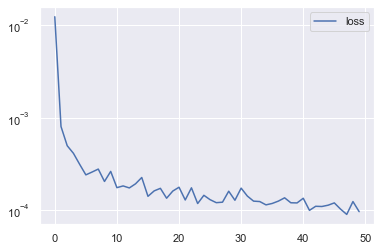

In [143]:
plt.plot(ann.history.history['loss'],label='loss')
plt.yscale("log")
plt.legend()

In [64]:
y_pred = ann.predict(X_test)

12/12 [==============================] - 0s 2ms/step


In [65]:
# We look at the RMSE, MSLE, MAPE
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_absolute_percentage_error

print(mean_squared_error(Y_test,y_pred, squared = False))
print(mean_squared_log_error(Y_test, y_pred))
print(mean_absolute_percentage_error(Y_test, y_pred))

0.015885432840660952
7.511278845760909e-05
0.012849595634937799


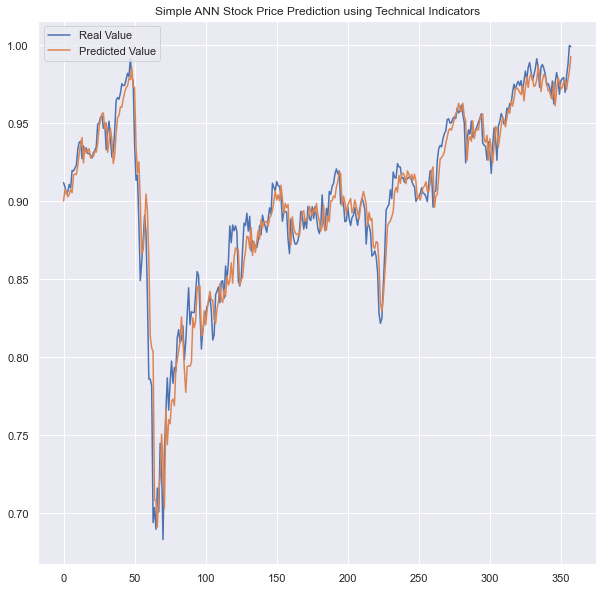

In [44]:
# We plot our predicted vs the true stock price
fig,ax = plt.subplots(figsize=(10,10))
ax.plot(Y_test,label = 'Real Value')
ax.plot(y_pred,label = 'Predicted Value')
ax.title.set_text("Simple ANN Stock Price Prediction using Technical Indicators")
plt.legend(loc="upper left")

## Cross Validation

In [74]:
# We perform a sliding window Cross Validation
from sklearn.model_selection import TimeSeriesSplit

X = []
y = []
rmse = 0
rmsle = 0
mape = 0
for i in range(30, len(scaled_data)):
            X.append(scaled_data[i-30:i,:])
            y.append(scaled_data[i,-1])
X = np.array(X)
y = np.array(y)


tscv = TimeSeriesSplit(n_splits=5, test_size = 600)
for train_index, test_index in tscv.split(X):
    print("TRAIN:", len(train_index), "TEST:", len(test_index))
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1]*9))
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1]*9))
    
    # Building our ANN
    ann = Sequential()
    ann.add(Dense(units = 120, activation = 'relu', input_dim = X_train.shape[1]))
    ann.add(Dense(units = 60))
    ann.add(Dense(units = 1))
    ann.compile(optimizer = 'adam', loss = 'mean_squared_error')
    ann.fit(X_train, y_train, batch_size = 32, epochs = 50, verbose = 0)
    
    # Predict
    y_pred = ann.predict(X_test)
    
    # Test accuracy
    rmse = rmse + mean_squared_error(y_test,y_pred, squared = False)
    rmsle = rmsle +mean_squared_log_error(y_test, y_pred, squared= False)
    mape = mape + mean_absolute_percentage_error(y_test, y_pred)
    print(mean_squared_error(y_test,y_pred, squared = False))
    print(mean_squared_log_error(y_test, y_pred, squared = False))
    print(mean_absolute_percentage_error(y_test, y_pred))
    
    

TRAIN: 4605 TEST: 600
19/19 [==============================] - 0s 2ms/step
0.009457139902447955
0.0063976204412450844
0.01520597905642027
TRAIN: 5205 TEST: 600
19/19 [==============================] - 0s 2ms/step
0.010300142495998602
0.0064619599943966394
0.014460258691440292
TRAIN: 5805 TEST: 600
19/19 [==============================] - 0s 2ms/step
0.013696983298272599
0.007968078268453646
0.014380422808391729
TRAIN: 6405 TEST: 600
19/19 [==============================] - 0s 2ms/step
0.014922809203438223
0.00852954205163589
0.017299057168600907
TRAIN: 7005 TEST: 600
19/19 [==============================] - 0s 2ms/step
0.013250094945289741
0.007217680432028373
0.010922596948711383


In [75]:
rmse=rmse/5
rmsle=rmsle/5
mape=mape/5
print(rmse)
print(rmsle)
print(mape)

0.012325433969089422
0.007314976237551928
0.014453662934712916
